In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data = pd.read_csv('TwitterHate.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweets = data['tweet']
tweets

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

### Data Cleaning and Analysis

Normalize the casing.

Using regular expressions, remove user handles. These begin with '@’.

Using regular expressions, remove URLs.

Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.

Remove stop words.

Remove redundant terms like ‘amp’, ‘rt’, etc.

Remove ‘#’ symbols from the tweet while retaining the term.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
def print_tweets(ts, count):
  for i in range(count):
    print(ts[i])

In [6]:
tweets = [tweet.lower().strip() for tweet in tweets]
print_tweets(tweets, 5)

@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
bihday your majesty
#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦
factsguide: society now    #motivation


In [9]:
tweets_clean = [re.sub('@([a-z]+[a-z0-9-_]+)','',tweet).strip() for tweet in tweets]
print_tweets(tweets_clean, 5)

when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
bihday your majesty
#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦
factsguide: society now    #motivation


In [10]:
url_re = 'www\.([a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),])+([a-z0-9])'
tweets_clean = [re.sub(url_re,'',tweet).strip() for tweet in tweets]

for tweet in tweets_clean:
  if(re.search(url_re, tweet)):
    print(tweet)

In [12]:
tknzr = TweetTokenizer( strip_handles=True, reduce_len=True)

In [13]:
tweets_tokenized = [tknzr.tokenize(tweet) for tweet in tweets_clean]
print_tweets(tweets_tokenized, 5)

['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#run']
['thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx', '.', '#disapointed', '#getthanked']
['bihday', 'your', 'majesty']
['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð', '\x9f', '\x93', '±', '!', '!', '!', 'ð', '\x9f', '\x98', '\x99', 'ð', '\x9f', '\x98', '\x8e', 'ð', '\x9f', '\x91', '\x84', 'ð', '\x9f', '\x91', 'ð', '\x9f', '\x92', '¦', 'ð', '\x9f', '\x92', '¦', 'ð', '\x9f', '\x92', '¦']
['factsguide', ':', 'society', 'now', '#motivation']


In [14]:
!pip install unidecode

     |████████████████████████████████| 235 kB 5.4 MB/s 


In [15]:
import unidecode

tweets_filtered = []
for tweet in tweets_tokenized:
  filter_wd = []
  for wd in tweet:
    if wd != '\d*':
      filter_wd.append(unidecode.unidecode(wd))
  
  tweets_filtered.append(filter_wd)


In [18]:
print(set(stopwords.words('english')))

{'be', 'being', "won't", 'there', 'their', 'before', 'now', 'at', 'how', 'wouldn', 'only', 'his', 'no', 't', 'yours', 'down', 'and', 'ours', 'by', 'she', 'above', 'with', 'themselves', 'through', 'i', "couldn't", "mightn't", "don't", 'should', 'until', 'me', 'him', 'wasn', 'haven', 'of', 'both', 'each', 'if', 'not', 'very', 'hasn', 'in', "should've", 'your', 'more', "wouldn't", 'up', 'whom', 're', 'ain', 'such', 'shouldn', 'while', 'as', 'same', 'its', 'they', 'further', "weren't", "haven't", 'can', 'are', 'itself', 'y', 'had', 'this', 'any', 'yourselves', "needn't", 'between', 'is', 'nor', "that'll", 'once', 've', "shouldn't", 'ma', 'which', 'own', 'because', 'couldn', 'those', 'our', 'weren', 'won', 'a', 'few', 'some', 'that', 'during', 'will', "isn't", 'he', 'been', 'it', 'to', 'didn', 'out', 'over', 'having', 'all', 'the', 'was', 'then', 'm', 'when', 'other', 'an', 'does', 'himself', "you're", 'from', 'hadn', 'just', 'aren', 'mightn', "you'd", 'about', "shan't", "you'll", 'did', 'f

In [19]:
stop_words = stopwords.words('english')

In [20]:
tweets_filter_sw = []
for tweet in tweets_filtered:
  filter_wd = []
  for wd in tweet:
    if wd not in stop_words:
      filter_wd.append(wd)
  
  tweets_filter_sw.append(filter_wd)

print_tweets(tweets_filter_sw, 5)

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', '.', '#run']
['thanks', '#lyft', 'credit', "can't", 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', '.', '#disapointed', '#getthanked']
['bihday', 'majesty']
['#model', 'love', 'u', 'take', 'u', 'time', 'urd', '', '', '+-', '!', '!', '!', '', '', '', '', '', '', '', '', '', '', '', '', '', '|', '', '', '|', '', '', '|']
['factsguide', ':', 'society', '#motivation']


In [21]:
tweets_filtered = []
for tweet in tweets_filter_sw:
  filter_wd = []
  for wd in tweet:
    if len(wd) > 1:
      filter_wd.append(wd)
  
  tweets_filtered.append(filter_wd)

print_tweets(tweets_filtered, 5)

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', '#run']
['thanks', '#lyft', 'credit', "can't", 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', '#disapointed', '#getthanked']
['bihday', 'majesty']
['#model', 'love', 'take', 'time', 'urd', '+-']
['factsguide', 'society', '#motivation']


In [22]:
hashtags = []
for tweet in tweets_filtered:
  filter_wd = []
  for wd in tweet:
    if wd.startswith('#'):
      filter_wd.append(wd[1:])
  
  if len(filter_wd) == 0:
    filter_wd.append('No #')
  hashtags.append(filter_wd)

print_tweets(hashtags, 5)

['run']
['lyft', 'disapointed', 'getthanked']
['No #']
['model']
['motivation']


In [24]:
wnlem = WordNetLemmatizer()

tweets_lem = []
for tweet in tweets_filtered:
  filter_wd = []
  for wd in tweet:
    filter_wd.append(wnlem.lemmatize(wd))
  
  tweets_lem.append(filter_wd)

print_tweets(tweets_lem, 5)

['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', '#run']
['thanks', '#lyft', 'credit', "can't", 'use', 'cause', 'offer', 'wheelchair', 'van', 'pdx', '#disapointed', '#getthanked']
['bihday', 'majesty']
['#model', 'love', 'take', 'time', 'urd', '+-']
['factsguide', 'society', '#motivation']


In [25]:
pstem = PorterStemmer()

tweets_stem = []
for tweet in tweets_lem:
  filter_wd = []
  for wd in tweet:
    filter_wd.append(pstem.stem(wd))
  
  tweets_stem.append(filter_wd)

print_tweets(tweets_stem, 5)

['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', '#run']
['thank', '#lyft', 'credit', "can't", 'use', 'caus', 'offer', 'wheelchair', 'van', 'pdx', '#disapoint', '#getthank']
['bihday', 'majesti']
['#model', 'love', 'take', 'time', 'urd', '+-']
['factsguid', 'societi', '#motiv']


In [26]:
tweet_corpus = []
for tweet in tweets_stem:
  tweet_corpus.append(' '.join(tweet))

print_tweets(tweet_corpus, 5)

father dysfunct selfish drag kid dysfunct #run
thank #lyft credit can't use caus offer wheelchair van pdx #disapoint #getthank
bihday majesti
#model love take time urd +-
factsguid societi #motiv


In [27]:
from collections import Counter

#10 most common words

all_words = []
for tweet in tweets_stem:
  all_words.extend(tweet)

ten_most_common = Counter(all_words).most_common(10)
print("Top ten most common words :\n", ten_most_common)

Top ten most common words :
 [('...', 2810), ('day', 2491), ('happi', 1720), ('#love', 1621), ('love', 1548), ('$?', 1311), ('get', 1246), ('go', 1230), ('time', 1203), ('thank', 1039)]


In [29]:
all_words_non_hate = ''
all_words_hate = ''
for tweet,lbl in zip(tweet_corpus, data['label'] == 0):
  if lbl:
    all_words_non_hate = all_words_non_hate + tweet
  else:
    all_words_hate = all_words_hate + tweet


Word Cloud: Non hate words


(-0.5, 399.5, 199.5, -0.5)

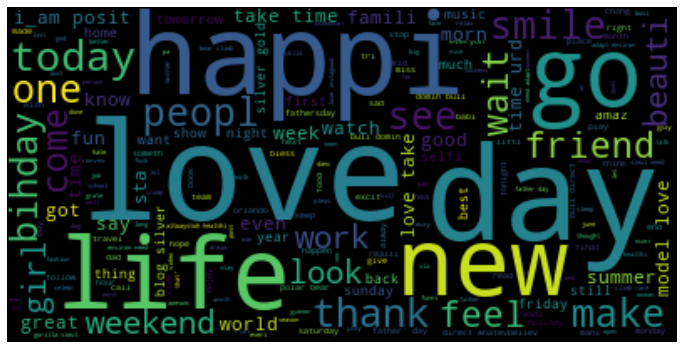

In [30]:
words_cloud = WordCloud().generate(all_words_non_hate)
print('Word Cloud: Non hate words')
plt.figure(figsize= (12,8))
plt.imshow(words_cloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Word Cloud: hate words


(-0.5, 399.5, 199.5, -0.5)

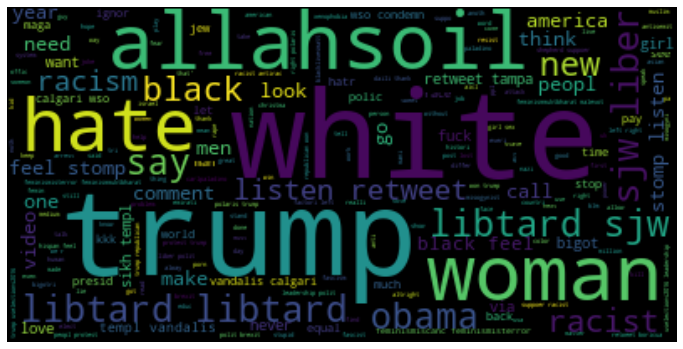

In [31]:
words_cloud = WordCloud().generate(all_words_hate)
print('Word Cloud: hate words')
plt.figure(figsize= (12,8))
plt.imshow(words_cloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

### Model Building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [33]:
x_train, x_test, y_train, y_test = train_test_split(tweet_corpus, data['label'], test_size=0.3, random_state=99)

In [34]:
tfidfvect = TfidfVectorizer(max_features=5000)
x_train_vect = tfidfvect.fit_transform(x_train)
x_test_vect = tfidfvect.transform(x_test)

In [36]:
logReg = LogisticRegression(random_state=99)

logReg.fit(x_train_vect, y_train)

LogisticRegression(random_state=99)

In [37]:
lr_pred_train = logReg.predict(x_train_vect)
lr_pred_test = logReg.predict(x_test_vect)

In [39]:
print('Test set')
print('Accuracy score: ', accuracy_score(y_test, lr_pred_test))
print('Recall Score: ', recall_score(y_test, lr_pred_test))
print('F1 score: ', f1_score(y_test, lr_pred_test))
print('Confusion Matrix : \n', confusion_matrix(y_test, lr_pred_test))

Test set
Accuracy score:  0.9524455104807592
Recall Score:  0.3302325581395349
F1 score:  0.48299319727891155
Confusion Matrix : 
 [[8920   24]
 [ 432  213]]


In [40]:
logReg = LogisticRegression(class_weight='balanced', random_state=99)

logReg.fit(x_train_vect, y_train)

lr_pred_train = logReg.predict(x_train_vect)
lr_pred_test = logReg.predict(x_test_vect) 

In [41]:
print('Test set')
print('Accuracy score: ', accuracy_score(y_test, lr_pred_test))
print('Recall Score: ', recall_score(y_test, lr_pred_test))
print('F1 score: ', f1_score(y_test, lr_pred_test))
print('Confusion Matrix : \n', confusion_matrix(y_test, lr_pred_test))

Test set
Accuracy score:  0.9296068411721764
Recall Score:  0.7891472868217054
F1 score:  0.6012994683992912
Confusion Matrix : 
 [[8405  539]
 [ 136  509]]


### Regularization and Hyperparameter tuning

In [43]:
param_dict={'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'newton-cg', 'sag'], 'C':[100, 10, 1.0, 0.1, 0.01]}

In [44]:
logReg = LogisticRegression(class_weight='balanced', random_state=99)

In [45]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=99)

In [46]:
grid_search = GridSearchCV(logReg, param_dict, cv=skf, scoring='recall', verbose=1)

In [47]:
grid_search.fit(x_train_vect, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=99, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=99),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'sag']},
             scoring='recall', verbose=1)

In [48]:
grid_search.best_estimator_

LogisticRegression(class_weight='balanced', random_state=99, solver='liblinear')

In [49]:
grid_search.best_score_

0.7802067669172932

In [51]:
grid_search.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [52]:
gs_y_pred = grid_search.best_estimator_.predict(x_test_vect)

In [53]:
print('Test set')
print('Accuracy score: ', accuracy_score(y_test, gs_y_pred))
print('Recall Score: ', recall_score(y_test, gs_y_pred))
print('F1 score: ', f1_score(y_test, gs_y_pred))
print('Confusion Matrix : \n', confusion_matrix(y_test, gs_y_pred))

Test set
Accuracy score:  0.92950255501095
Recall Score:  0.7891472868217054
F1 score:  0.6009445100354192
Confusion Matrix : 
 [[8404  540]
 [ 136  509]]
